In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-05-24 21:37:43.168946: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-24 21:37:46.021376: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# ImageDataGenerator untuk augmentasi dan preprocessing data training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2
)

In [4]:
valid_datagen = ImageDataGenerator(
    rescale=1./255
)

# Preparing The Data

In [5]:
img_height,img_width=224,224
batch_size=32
train_ds = train_datagen.flow_from_directory(
  "preprocessed_images/train",
  seed=123,
  class_mode='categorical',
  target_size=(img_height, img_width),
  batch_size=batch_size)


Found 4216 images belonging to 3 classes.


In [6]:
val_ds = valid_datagen.flow_from_directory(
  "preprocessed_images/val",
  seed=123,
  class_mode='categorical',
  target_size=(img_height, img_width),
  batch_size=batch_size)

Found 465 images belonging to 3 classes.


In [7]:
class_names = list(train_ds.class_indices.keys())
print("Class names:", class_names)

Class names: ['crack', 'good', 'pothole']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load a batch of images and labels from the training dataset
images, labels = next(train_ds)

plt.figure(figsize=(10, 10))
for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype("uint8"))

    # Convert one-hot encoded label to integer
    label_int = np.argmax(labels[i])
    plt.title(class_names[label_int])
    plt.axis("off")

plt.show()

# Training The Model


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Define the Sequential model
resnet_model = Sequential()

# Load the pretrained ResNet50 model without the top layer
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   weights='imagenet')

# Freeze the layers in the pretrained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Add the pretrained ResNet50 model to the Sequential model
resnet_model.add(pretrained_model)

# Add Flatten, Dense, and other layers
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(3, activation='softmax'))

# Print the model summary
resnet_model.summary()


2024-05-24 22:04:10.407465: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3503 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
resnet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
epochs=30
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


2024-05-24 22:04:24.944218: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.
2024-05-24 22:04:25.064407: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.
2024-05-24 22:04:25.557215: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.
2024-05-24 22:04:25.731456: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.
2024-05-24 22:04:25.902309: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.
/home/fnilvu/Downloads/Proyek Skripsi/RoadCrack Flask/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can 

132/132 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.4447 - loss: 7.7061 - val_accuracy: 0.7183 - val_loss: 0.7495
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 107s 774ms/step - accuracy: 0.6385 - loss: 0.9377 - val_accuracy: 0.6839 - val_loss: 0.8077
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 106s 767ms/step - accuracy: 0.6872 - loss: 0.8449 - val_accuracy: 0.6602 - val_loss: 0.8428
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 123s 889ms/step - accuracy: 0.7003 - loss: 0.7757 - val_accuracy: 0.7398 - val_loss: 0.7160
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 137s 984ms/step - accuracy: 0.7193 - loss: 0.7261 - val_accuracy: 0.7828 - val_loss: 0.6162
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 138s 997ms/step - accuracy: 0.7466 - loss: 0.6089 - val_accuracy: 0.6968 - val_loss: 0.8043
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 135s 976ms/step - accuracy: 0.7084 - loss: 0.7147 - val_accuracy: 0.6946 - val_loss: 0.7938
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 133s 963ms/step - accuracy: 0.7411 - loss: 0.6471 

# Evaluating The Model

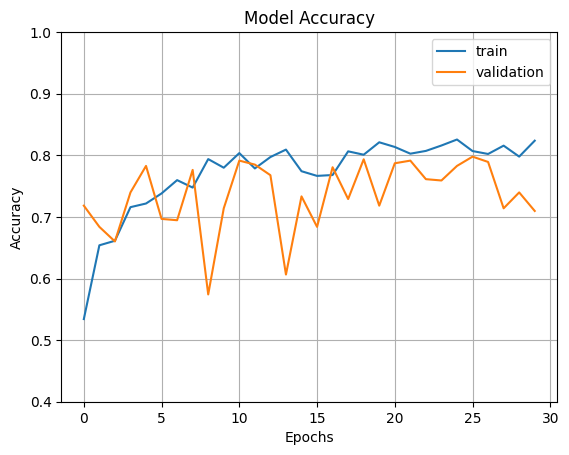

In [12]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

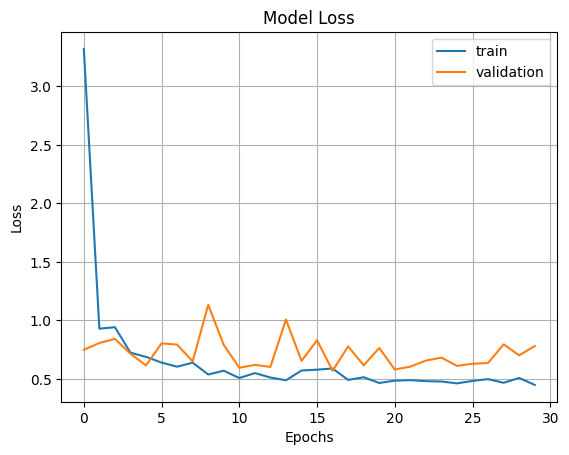

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

In [14]:
import cv2
image=cv2.imread("preprocessed_images/val/good/Good_0002.jpg")

image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 224, 224, 3)


In [15]:
pred=resnet_model.predict(image)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
[[9.9999940e-01 5.9602991e-07 1.9468186e-18]]


In [16]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is crack


In [17]:
# save as directory
resnet_model.export('road_crack')

INFO:tensorflow:Assets written to: road_crack/assets


INFO:tensorflow:Assets written to: road_crack/assets


Saved artifact at 'road_crack'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_175')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  130186902787824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130186902788880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130186902789056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130186902789232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130186902788528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130186902788176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130186902790816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130186902791872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130186902791168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130186902792048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130186902791696:

In [20]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(resnet_model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open("road_crack.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpzj5i0rv7/assets


INFO:tensorflow:Assets written to: /tmp/tmpzj5i0rv7/assets


: 